Data Analyzing

- How many rows and columns?
- What is the correlation between the variables and the price? (Why might that be?)
- How are variables correlated to each other? (Why?)
- Which variables have the greatest influence on the price?
- Which variables have the least influence on the price?
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Import libraries and establish df

In [22]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_json('final_dataset.json')
df = df.replace(r'\s+', '', regex=True)
df_cleaned = df.dropna()

df_cleaned

,Url,Openfire,Furnished,Terrace,Garden,PropertyId,TypeOfProperty,PostalCode,SubtypeOfProperty,TypeOfSale,...,Kitchen,StateOfBuilding,Heating,Bedrooms,SurfaceOfGood,SwimmingPool,ConstructionYear,GardenArea,LivingArea,NumberOfFacades
131,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,10757487,1,1330,house,1,...,hyperequipped,justrenovated,gas,3,348.0,False,1930.0,348.0,152.0,3.0
467,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,10749840,2,9550,townhouseunit,1,...,installed,good,gas,3,241.0,False,2023.0,178.0,132.0,3.0
589,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,10747901,1,4630,villa,1,...,installed,good,fueloil,4,1980.0,False,1977.0,1850.0,147.0,4.0
610,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,10747198,1,1755,house,1,...,installed,torenovate,fueloil,3,433.0,False,1962.0,220.0,120.0,4.0
664,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,10745947,1,1560,house,1,...,semiequipped,torenovate,fueloil,5,345.0,False,1918.0,345.0,216.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171769,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,9316562,1,6061,house,1,...,semiequipped,tobedoneup,gas,3,644.0,False,1900.0,300.0,115.0,3.0
174674,https://www.immoweb.be/en/classified/house/for...,False,False,False,True,9033044,1,7000,mansion,2,...,hyperequipped,good,fueloil,4,4000.0,False,1935.0,3700.0,300.0,4.0
174936,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,9002845,1,6020,house,1,...,semiequipped,good,fueloil,3,155.0,False,1900.0,59.0,133.0,2.0
175410,https://www.immoweb.be/en/classified/house/for...,False,False,True,True,8942923,1,1640,exceptionalproperty,2,...,usahyperequipped,asnew,gas,6,4000.0,False,2013.0,1.0,634.0,4.0


Display variables to compare with price

In [23]:
df_cleaned.columns

Index(['Url', 'Openfire', 'Furnished', 'Terrace', 'Garden', 'PropertyId',
       'TypeOfProperty', 'PostalCode', 'SubtypeOfProperty', 'TypeOfSale',
       'Price', 'Kitchen', 'StateOfBuilding', 'Heating', 'Bedrooms',
       'SurfaceOfGood', 'SwimmingPool', 'ConstructionYear', 'GardenArea',
       'LivingArea', 'NumberOfFacades'],
      dtype='object')

Correlation between 'Openfire' and 'Price'

In [25]:
print(df_cleaned['Openfire'].value_counts())
print(df_cleaned['Openfire'].groupby(df_cleaned['Price']).median())
print(df_cleaned.info())


Openfire
False    5383
Name: count, dtype: int64
Price
425        0.0
520        0.0
550        0.0
675        0.0
755        0.0
          ... 
6400000    0.0
6495000    0.0
6995000    0.0
7365000    0.0
9250000    0.0
Name: Openfire, Length: 870, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 5383 entries, 131 to 175608
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Url                5383 non-null   object 
 1   Openfire           5383 non-null   bool   
 2   Furnished          5383 non-null   bool   
 3   Terrace            5383 non-null   bool   
 4   Garden             5383 non-null   bool   
 5   PropertyId         5383 non-null   int64  
 6   TypeOfProperty     5383 non-null   int64  
 7   PostalCode         5383 non-null   int64  
 8   SubtypeOfProperty  5383 non-null   object 
 9   TypeOfSale         5383 non-null   int64  
 10  Price              5383 non-null   int64  
 11  K

In [12]:
#no open fire move to the next variable

Correlation 'Furnished' with 'Price'

In [24]:
print(df_cleaned['Furnished'].value_counts())
print(df_cleaned['Furnished'].groupby(df_cleaned['Price']).median())
print(df_cleaned.info())


Furnished
False    5230
True      153
Name: count, dtype: int64
Price
425        0.0
520        0.0
550        1.0
675        0.0
755        0.0
          ... 
6400000    1.0
6495000    0.0
6995000    0.0
7365000    0.0
9250000    0.0
Name: Furnished, Length: 870, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 5383 entries, 131 to 175608
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Url                5383 non-null   object 
 1   Openfire           5383 non-null   bool   
 2   Furnished          5383 non-null   bool   
 3   Terrace            5383 non-null   bool   
 4   Garden             5383 non-null   bool   
 5   PropertyId         5383 non-null   int64  
 6   TypeOfProperty     5383 non-null   int64  
 7   PostalCode         5383 non-null   int64  
 8   SubtypeOfProperty  5383 non-null   object 
 9   TypeOfSale         5383 non-null   int64  
 10  Price              5383 non-null 

0.03762203625404556


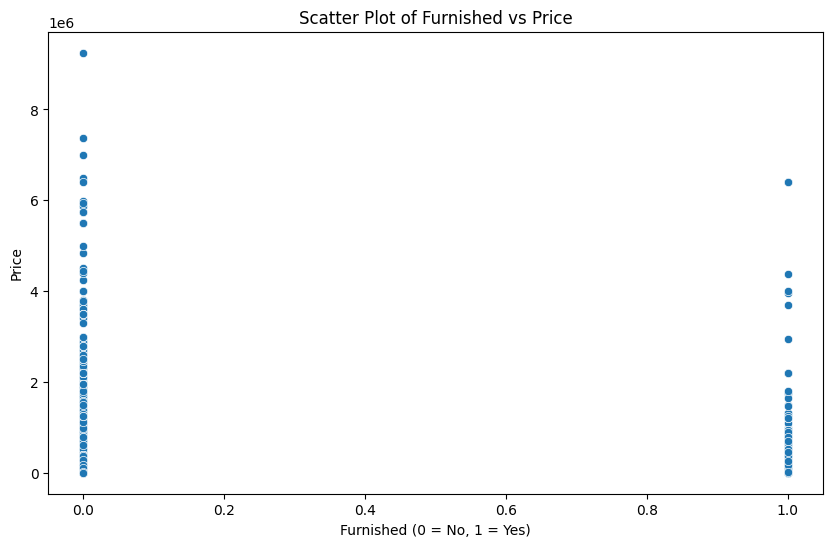

In [19]:
coeff = df_cleaned.Furnished.corr(df_cleaned['Price'])

print(coeff)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Furnished', y='Price', data=df_cleaned)
plt.title('Scatter Plot of Furnished vs Price')
plt.xlabel('Furnished (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()


Correlation 'Terrace' and 'Price'

In [28]:
print(df_cleaned['Terrace'].value_counts())
print(df_cleaned['Terrace'].groupby(df_cleaned['Price']).median())
print(df_cleaned.info())

Terrace
True     4494
False     889
Name: count, dtype: int64
Price
425        1.0
520        1.0
550        1.0
675        1.0
755        1.0
          ... 
6400000    1.0
6495000    0.0
6995000    1.0
7365000    1.0
9250000    1.0
Name: Terrace, Length: 870, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 5383 entries, 131 to 175608
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Url                5383 non-null   object 
 1   Openfire           5383 non-null   bool   
 2   Furnished          5383 non-null   bool   
 3   Terrace            5383 non-null   bool   
 4   Garden             5383 non-null   bool   
 5   PropertyId         5383 non-null   int64  
 6   TypeOfProperty     5383 non-null   int64  
 7   PostalCode         5383 non-null   int64  
 8   SubtypeOfProperty  5383 non-null   object 
 9   TypeOfSale         5383 non-null   int64  
 10  Price              5383 non-null   in

0.0719043953489897


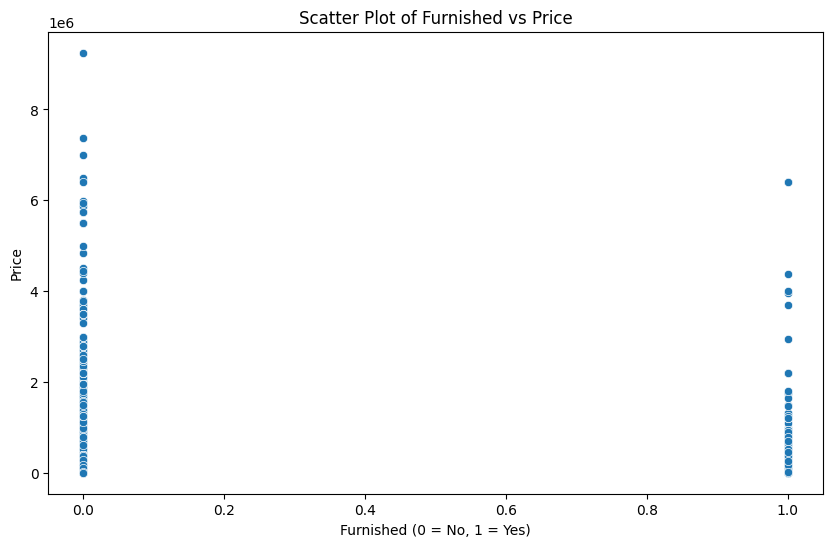

In [29]:
coeff = df_cleaned.Terrace.corr(df_cleaned['Price'])

print(coeff)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Furnished', y='Price', data=df_cleaned)
plt.title('Scatter Plot of Furnished vs Price')
plt.xlabel('Furnished (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

Correlation 'Garden' and 'Price'